# Datacamp Practical Exam - Fitness Class

### Question 1

In [537]:
# Load libraries
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

In [538]:
# Load in data
file = '/Users/blakehummer/Desktop/fitness_class_2212.csv'
data = pd.read_csv(file)

In [539]:
# Take a look
data.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [540]:
# Check data types
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [541]:
# Find missing values
data.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [542]:
# Look at values
for col in data.columns:
    print(data[col].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64
10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
Fri          279
Thu       

In [543]:
# Impute and correct values and data types
data['booking_id'] = data['booking_id'].astype('category')

In [544]:
data['weight'].fillna(data['weight'].mean(), inplace = True)
data['weight'].isnull().sum()

0

In [545]:
data['days_before'] = data['days_before'].str.replace(' days', '').astype('int64')
data['days_before'].value_counts()

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

In [546]:
data['day_of_week'] = data['day_of_week'].str.replace('.', '', regex = False)
data['day_of_week'] = data['day_of_week'].str.replace('Wednesday', 'Wed')
data['day_of_week'] = data['day_of_week'].str.replace('Monday', 'Mon')
data['day_of_week'] = data['day_of_week'].astype('category')
data['day_of_week'].value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [547]:
data['time'] = pd.Categorical(data['time'], categories = ['AM', 'PM'], ordered = True)

In [548]:
data['category'] = data['category'].str.replace('-', 'unknown').astype('category')
data['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

In [549]:
# Ensure all data types are correct before moving on
data['attended'] = data['attended'].astype('category')
data.dtypes

booking_id          category
months_as_member       int64
weight               float64
days_before            int64
day_of_week         category
time                category
category            category
attended            category
dtype: object

### Question 2

<AxesSubplot:xlabel='category', ylabel='count'>

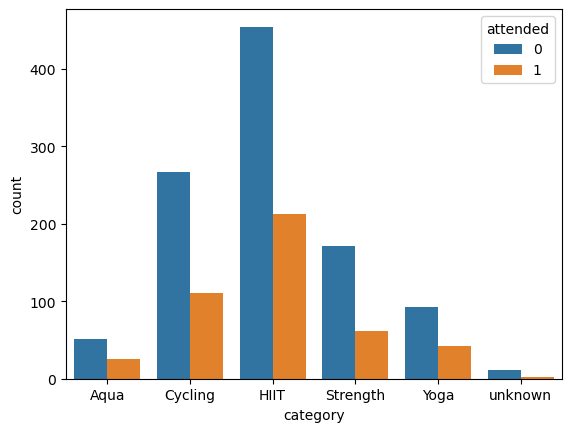

In [550]:
# visualize how many bookings attended the class
sns.countplot(data = data, x = 'category', hue = 'attended')

### Question 3

<AxesSubplot:xlabel='months_as_member', ylabel='Count'>

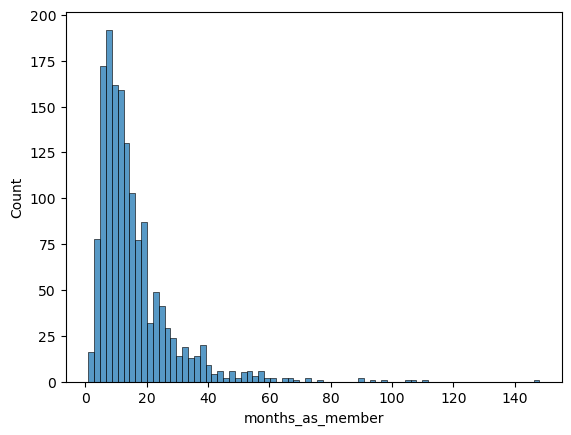

In [582]:
# Visualize 'months_as_member' distribution
sns.histplot(data = data, x = "months_as_member")

### Question 4

<AxesSubplot:xlabel='attended', ylabel='months_as_member'>

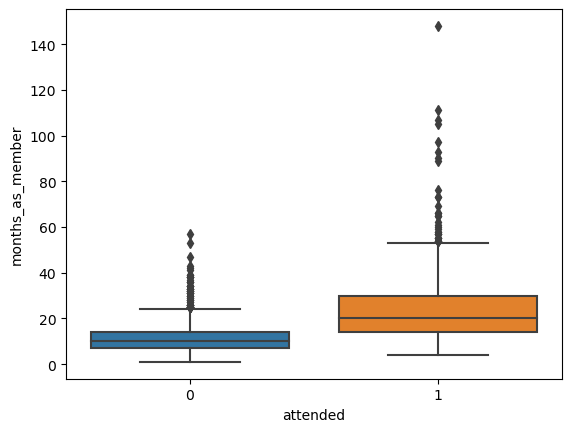

In [552]:
# Observe relationship between attendance and months as a member
sns.boxplot(data = data, x = 'attended', y = 'months_as_member')

In [553]:
# Kruskal-Wallace test to see if difference between groups is significant
d_group0 = data[data['attended'] == 0]['months_as_member']
d_group1 = data[data['attended'] == 1]['months_as_member']
stats.kruskal(d_group0, d_group1)

KruskalResult(statistic=395.24440529633216, pvalue=5.972871195461503e-88)

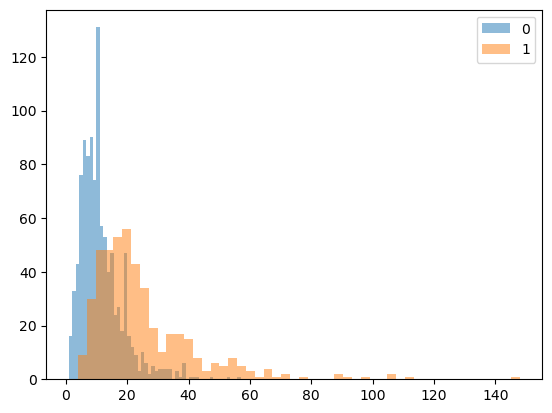

In [583]:
# Distributions of months as a member based on attendance
plt.pyplot.hist(d_group0, bins = 50, alpha = 0.5, label = '0')
plt.pyplot.hist(d_group1, bins = 50, alpha = 0.5, label = '1')
plt.pyplot.legend(loc = 'upper right')

### Question 6

In [555]:
# Load required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [556]:
# Encode nominal categorical data
OHE = OneHotEncoder(handle_unknown = 'ignore')
OHE_data = pd.DataFrame(OHE.fit_transform(data[['day_of_week', 'category']]).toarray(), columns = OHE.get_feature_names_out(['day_of_week', 'category']))
OHE_df = data.join(OHE_data)

In [557]:
# Encode ordinal categorical data
LE = LabelEncoder()
LE_data = pd.DataFrame(LE.fit_transform(OHE_df['time']), columns=['time_LE'])
LE_df = OHE_df.join(LE_data)
LE_df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,day_of_week_Fri,day_of_week_Mon,...,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown,time_LE
0,1,17,79.56,8,Wed,PM,Strength,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,2,10,79.01,2,Mon,AM,HIIT,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,3,16,74.53,14,Sun,AM,Strength,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,4,5,86.12,10,Fri,AM,Cycling,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,5,15,69.29,8,Thu,AM,HIIT,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [558]:
# Prepare features and labels
X = LE_df.drop(['booking_id', 'day_of_week', 'category', 'time', 'attended'], axis = 1)
y = LE_df['attended']

In [559]:
X

,months_as_member,weight,days_before,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown,time_LE
0,17,79.56,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,10,79.01,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,16,74.53,14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,5,86.12,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,15,69.29,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,21,79.51,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1496,29,89.55,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1497,9,87.38,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1498,34,68.64,14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [560]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1500, dtype: category
Categories (2, int64): [0, 1]

In [561]:
# Train test split data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=0)

In [562]:
# Ensure datasets are proper shape
print('X_train = ', X_train.shape)
print('y_train = ', y_train.shape)
print('X_test = ', X_test.shape)
print('y_test = ', y_test.shape)

X_train =  (1050, 17)
y_train =  (1050,)
X_test =  (450, 17)
y_test =  (450,)


In [563]:
# Instantiate Decision Tree, fit, and predict
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [564]:
# Predict values and determine accuracy
DT_predictions = DT_model.predict(X_test)

### Question 7

In [565]:
# Load required module
from sklearn.ensemble import RandomForestClassifier

In [566]:
# Instantiate Random Forest and train model
RFC_model = RandomForestClassifier(n_estimators = 100)
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [567]:
# Predict values and determine accuracy
RFC_predictions = RFC_model.predict(X_test)
RFC_acc = accuracy_score(y_test, RFC_predictions)
RFC_acc

0.7466666666666667

### Question 9

In [568]:
# Load required metrics
from sklearn.metrics import precision_score, recall_score

In [569]:
# Decision Tree accuracy
DT_acc = accuracy_score(y_test, DT_predictions)
DT_acc

0.7133333333333334

In [570]:
# Random Forest accuracy
RFC_acc = accuracy_score(y_test, RFC_predictions)
RFC_acc

0.7466666666666667

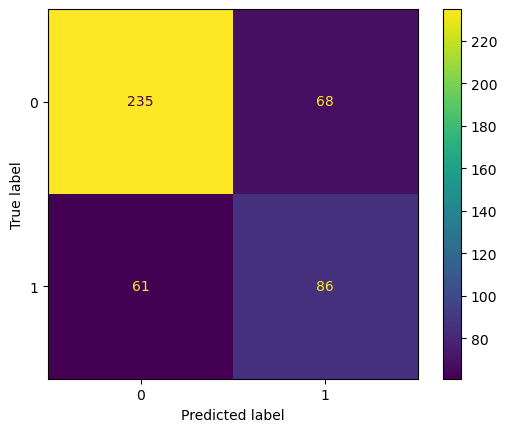

In [571]:
# Confusion matrix for Decision Tree
cm = confusion_matrix(y_test, DT_predictions, labels = DT_model.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DT_model.classes_).plot()

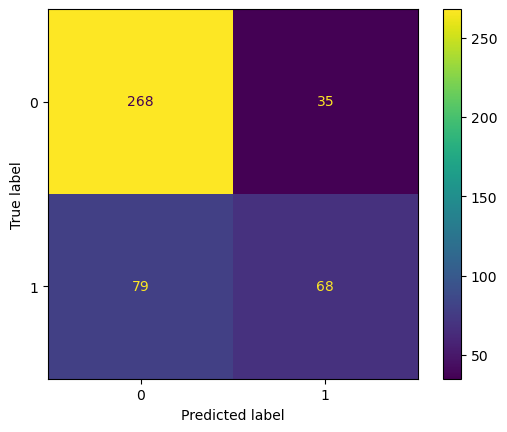

In [572]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, RFC_predictions, labels = RFC_model.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = RFC_model.classes_).plot()

In [573]:
# Calculate accuracy, precision, and recall scores for Decision Tree
accuracy = accuracy_score(DT_predictions, y_test)
precision = precision_score(DT_predictions, y_test)
recall = recall_score(DT_predictions, y_test)

apr_dict = {'DecisionTree': [accuracy, precision, recall]}

In [574]:
# Calculate accuracy, precision, and recall scores for Random Forest
accuracy = accuracy_score(RFC_predictions, y_test)
precision = precision_score(RFC_predictions, y_test)
recall = recall_score(RFC_predictions, y_test)

apr_dict.update({'RandomForest': [accuracy, precision, recall]})

In [575]:
# Make dataframe with results
model_comparison = pd.DataFrame.from_dict(apr_dict, orient='index', columns = ['accuracy', 'precision', 'recall'])
model_comparison

,accuracy,precision,recall
DecisionTree,0.713333,0.585034,0.558442
RandomForest,0.746667,0.462585,0.660194


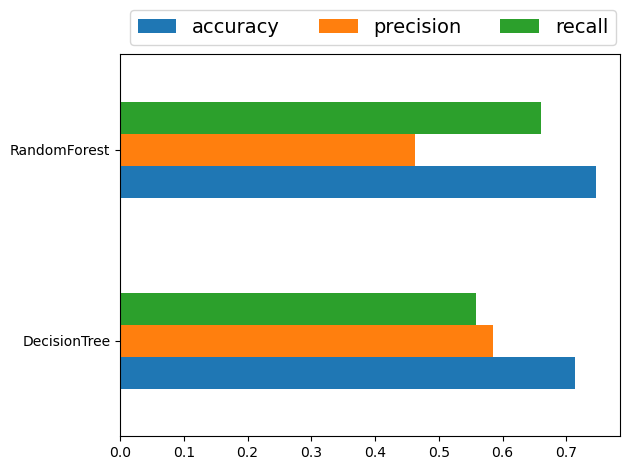

In [576]:
# And plot
ax = model_comparison.plot.barh()
ax.legend(
    ncol=3,
    bbox_to_anchor=(0, 1), 
    loc='lower left',
    prop={'size': 14})
pyplot.tight_layout()

# Extra

### Other models, analyses, and thoughts

In [577]:
# Import model
from sklearn.svm import SVC

In [578]:
# Instantiate support vector classification
SVC_model = SVC()

0.74
0.30612244897959184
0.75


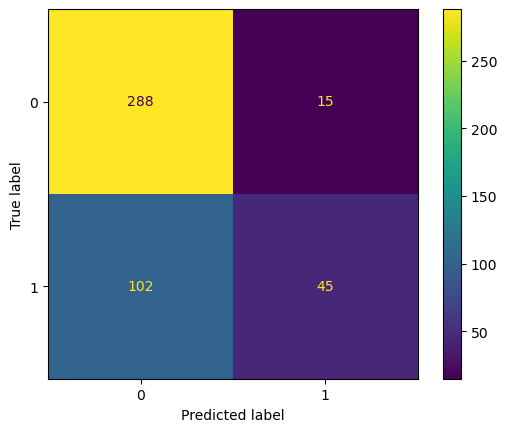

In [579]:
# Fit, predict, and plot confusion matrix
SVC_model.fit(X_train, y_train)
SVC_predictions = svc.predict(X_test)
cm = confusion_matrix(y_test, SVC_predictions, labels = SVC_model.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVC_model.classes_).plot()
print(accuracy_score(SVC_predictions, y_test))
print(precision_score(SVC_predictions, y_test))
print(recall_score(SVC_predictions, y_test))

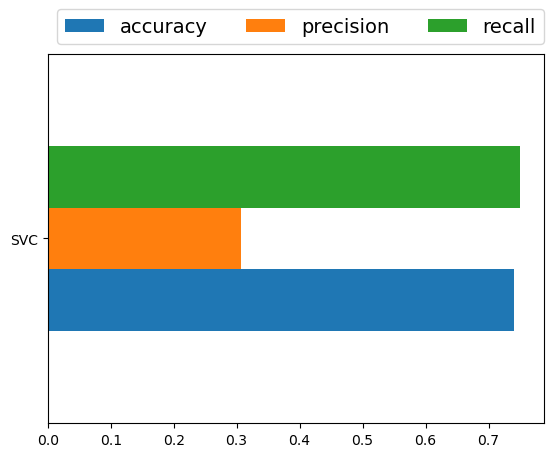

In [580]:
# Calculate accuracy, precision, and recall scores for SVC and plot
accuracy = accuracy_score(SVC_predictions, y_test)
precision = precision_score(SVC_predictions, y_test)
recall = recall_score(SVC_predictions, y_test)

svc_dict = {'SVC': [accuracy, precision, recall]}

svc_df = pd.DataFrame.from_dict(svc_dict, orient='index', columns = ['accuracy', 'precision', 'recall'])
ax = svc_df.plot.barh()
ax.legend(
    ncol=3,
    bbox_to_anchor=(0, 1), 
    loc='lower left',
    prop={'size': 14})